In [57]:
import numpy as np #computation purpose
import pandas as pd #data manupulation like add rows and desinging dataframe
import sklearn #Machinelearning package like linear regression

Now we will load the data that we will bw using to train our model
Here we are using [boston house pricing](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
) dataset which is avaoilable in the sklearn library itself.

In [58]:
from sklearn.datasets import load_boston #directly load datasets 
df=load_boston()#assigning full datasets to a variable df

In [59]:
df.keys() #to view keys

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [60]:
print(df.DESCR) #we can check keys to know what are their values assigned to it

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [61]:
boston=pd.DataFrame(df.data, columns=df.feature_names)#desiging data into a dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [62]:
boston['MEDV']=df.target #adding price column as medv and assiging target values to it
boston.head()#to view boston df head() by default views 5 rows; wanna see more use:head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
boston.isnull() #checks null value;True(1) False(0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
boston.isnull().sum() #very difficult to chheck 506 to ten thousand colums of true false value so sum() fn will adds every bin num in col and dis plays reslt. So that we can check easily any true values are present in a particular colum or row.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

We never train the model on all the data that we have, we always make sure to 
atleast have a test datasets, which is different from the taining datasets


Dividing the entire dataframe we designed into two parts, the training data and the testing data inorder to train our machine learning model


In [65]:
from sklearn.model_selection import train_test_split #sklearn have package to split the datasets into train and test data
X=boston.drop('MEDV',axis=1) #x has diffrent colums in df except medv column because with x we have to predict medv column;
#drop- drops/delete particular colum(here medv);axis=1 means delete column/axis=0 means delete row mentioned;Not affect the original boston df desined; made copy to X and then we are deleting the column(in this case)
Y=boston['MEDV'] #y is target value or medv column (i.e) price of house


In [66]:
#Use x to predict y
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.15, random_state=5)
#declaring the test and testing values paring up respectively; Xtrain-Ytrain;Xest-Y-test
#X_train, X_test, Y_train, Y_test are tuples = use of package to commanding to split(feed X,feed Y,give size of test to want to allocate[here(15/100) used 15 Q for test and 85 to train],random set-which part of the df  is chosed to be as train and test is dome by random basis)

In [67]:
# to view X_train, X_test, Y_train, Y_test total no. of col and rows RxC)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(430, 13)
(76, 13)
(430,)
(76,)


Now lets import linear regression model from sklearn  and train it on training 
dataset 

In [68]:
from sklearn.linear_model import LinearRegression #import liner reggression
from sklearn.metrics import mean_squared_error # to find error values are there from the predicted values from what we expected from it

## SPLITTING THE DATASETS INTO THE TRAIN AND THE TEST TO MAKE SURE THE


In [69]:
lin_model=LinearRegression()#assiging var lin_model as LinearRegression
lin_model.fit(X_train, Y_train)#fitting/feeding the splitted values to training dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
#ON TRAINING SET
y_train_predict=lin_model.predict(X_train) #Commanding to predict from X_train data set given and store in y_train_predict var
rmse=(np.sqrt(mean_squared_error(Y_train, y_train_predict))) 
print("The Model performance for training set")
print('RMSE id {}'.format(rmse))
print("\n")



The Model performance for training set
RMSE id 4.710901797319796




In [71]:

#ON TESTING SET
# same as we did for test dataset.

y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The Model performance for training set")
print('RMSE id {}'.format(rmse))
print("\n")

The Model performance for training set
RMSE id 4.687543527902972




Text(0, 0.5, 'Predicted')

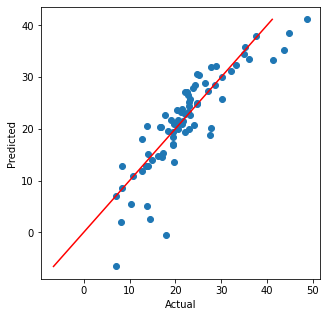

In [72]:
#MATPLOTLIB IS A LIBRARY TO PLOT THE CURVES
#PART OF VISUALIZATION IN FORMS OF GRAPHS AND CHARTS

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter (Y_test, y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)],color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')